# **Customer churn rate prediction**

## **Data Preprocessing**

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [43]:
df = pd.read_csv('Churn_Modelling.csv')

### **Data Exploration**

In [44]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [45]:
df.shape

(10000, 14)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [47]:
df.select_dtypes(include=['object']).columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [48]:
df.select_dtypes(include=['int64','float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [49]:
len(df.select_dtypes(include=['int64','float64']).columns)

11

In [50]:
# statistical summary
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### **Dealing with missing data**

In [51]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### **Encoding the categorical data**

In [52]:
df.drop(columns=["RowNumber","CustomerId","Surname"],axis=1, inplace=True)

In [53]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [55]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [56]:
df = pd.get_dummies(data = df, drop_first=True)
df = df.replace({True:1,False:0})

In [57]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### **Count Plot**

In [58]:

df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

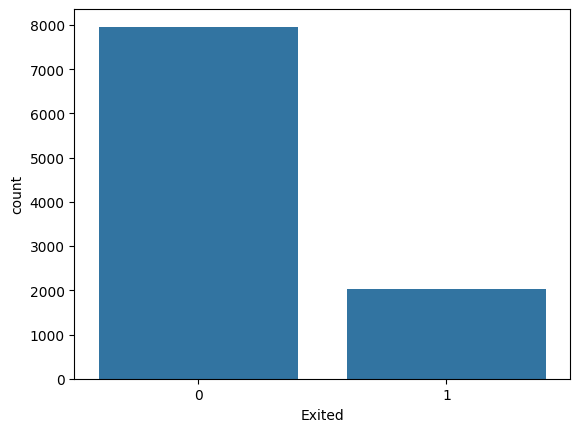

In [59]:
sns.countplot(data=df, x="Exited")

### **Correlation Matrix and Heatmap**

In [60]:
x = df.drop(columns="Exited")
y = df["Exited"]

In [61]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [62]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

<Axes: title={'center': 'Correlation with Exited'}>

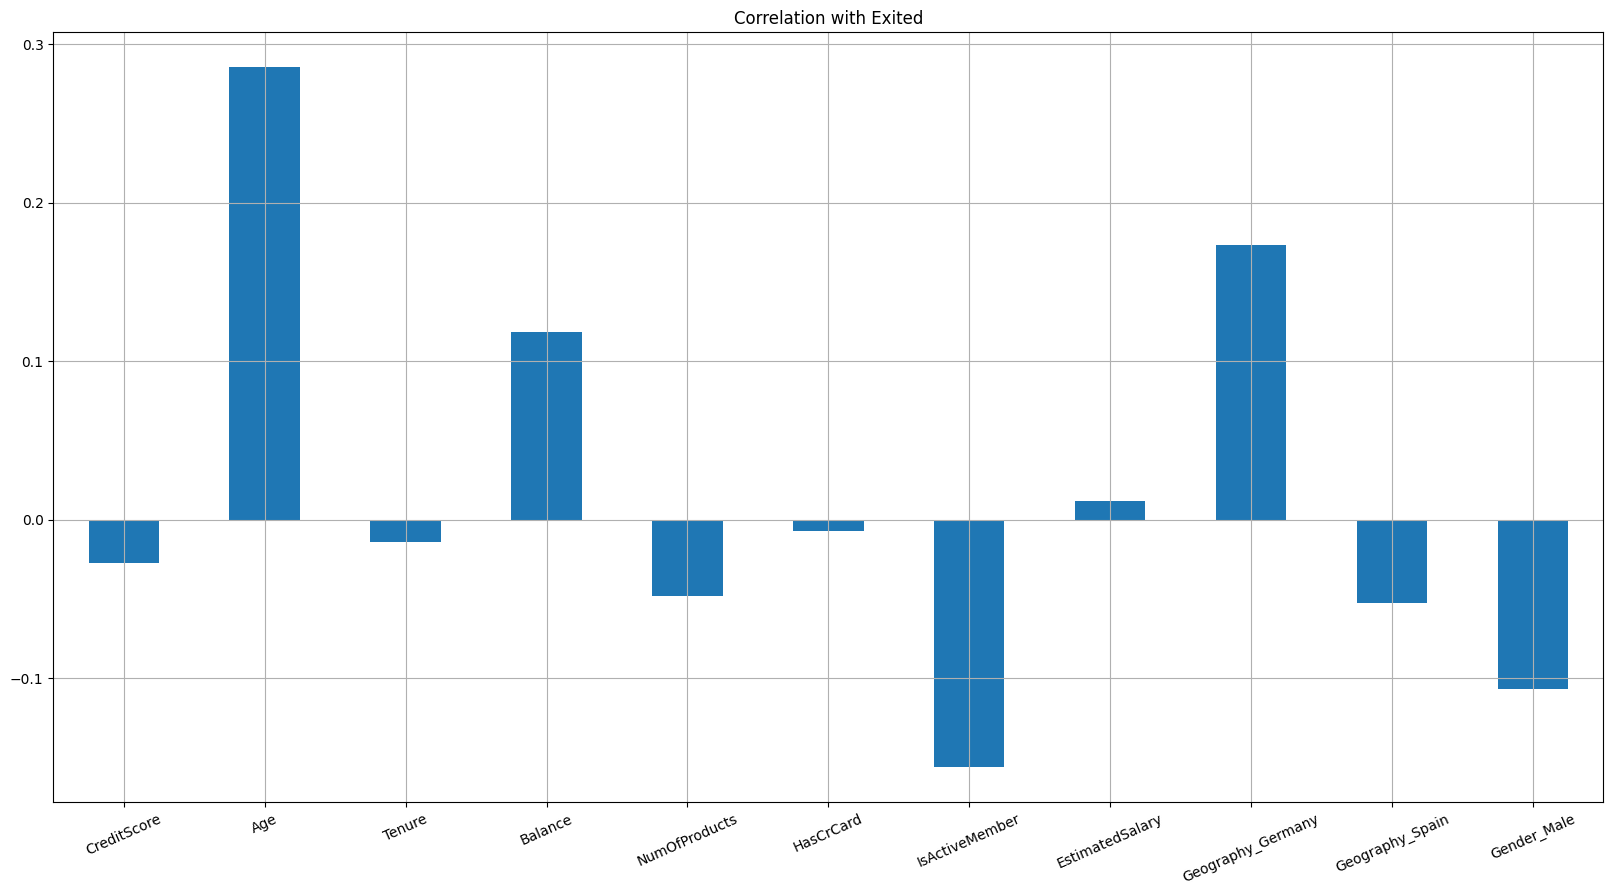

In [63]:
x.corrwith(df["Exited"]).plot.bar(
    figsize=(20,10), title="Correlation with Exited",rot=24, grid=True
)

In [64]:
corr = df.corr()

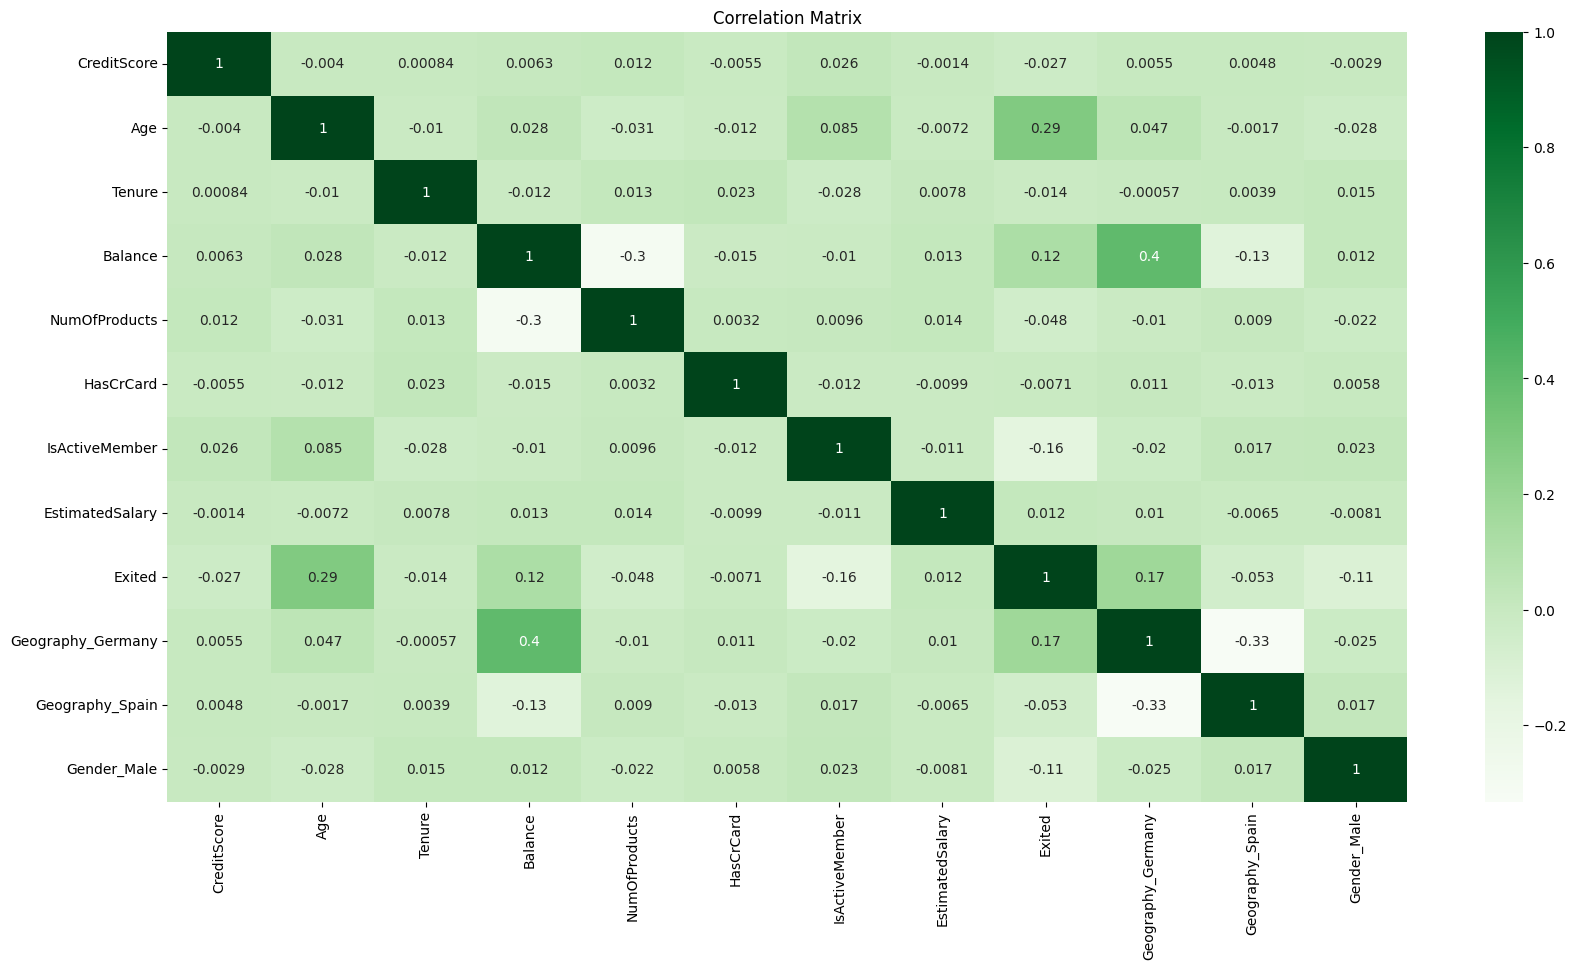

In [65]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap="Greens")
plt.title("Correlation Matrix")
plt.show()

### **Splitting the data into training and testing data**

In [66]:
# Seprating the dependent and independent variables
x = df.drop(columns="Exited")
y = df["Exited"]

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### **Feature Scalling**

In [68]:
SS = StandardScaler()
x_train = SS.fit_transform(x_train)
x_test = SS.fit_transform(x_test)

## **Building the model**

### **Logistic Regression**

In [69]:
LR = LogisticRegression(random_state=0)
LR.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [70]:
y_pred = LR.predict(x_test)

In [71]:
def acc_test(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)

    return print("Accuracy:",acc,"\n F1 Score:",f1,"\n Precision:",prec,"\n Recall:",rec)

In [74]:

acc_test(y_test,y_pred)

Accuracy: 0.813 
 F1 Score: 0.315018315018315 
 Precision: 0.6099290780141844 
 Recall: 0.2123456790123457


In [76]:
CM = confusion_matrix(y_test,y_pred)
print(CM)

[[1540   55]
 [ 319   86]]


#### **Cross Validation**

In [80]:
# Cross Validation
CV = cross_val_score(estimator=LR,X=x_train,y=y_train,cv=10)

In [81]:
print("Accuracy is {:.2f} %".format(CV.mean()*100))
print("Standard Deviation is {:.2f} %".format(CV.std()*100))

Accuracy is 80.85 %
Standard Deviation is 0.86 %


### **Random Forest Regression**

In [83]:
RFC = RandomForestClassifier(random_state=0)

In [84]:
RFC.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [87]:
y_pred = RFC.predict(x_test)

In [88]:
def acc_test(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)

    return print("Accuracy:",acc,"\n F1 Score:",f1,"\n Precision:",prec,"\n Recall:",rec)

In [89]:

acc_test(y_test,y_pred)

Accuracy: 0.8655 
 F1 Score: 0.6118326118326118 
 Precision: 0.7361111111111112 
 Recall: 0.5234567901234568


 Accuray of Logistic Regression
 
Accuracy: 0.813 

 F1 Score: 0.315018315018315 

 Precision: 0.6099290780141844 
 
 Recall: 0.2123456790123457

In [90]:
CM = confusion_matrix(y_test,y_pred)
print(CM)

[[1519   76]
 [ 193  212]]


#### **Cross Validation**

In [91]:
# Cross Validation
CV = cross_val_score(estimator=RFC,X=x_train,y=y_train,cv=10)

In [92]:
print("Accuracy is {:.2f} %".format(CV.mean()*100))
print("Standard Deviation is {:.2f} %".format(CV.std()*100))

Accuracy is 85.96 %
Standard Deviation is 1.02 %


### **GXBoost**

In [99]:
GXB = XGBClassifier()

In [100]:
GXB.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [101]:
y_pred=GXB.predict(x_test)

In [102]:
def acc_test(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)

    return print("Accuracy:",acc,"\n F1 Score:",f1,"\n Precision:",prec,"\n Recall:",rec)

In [103]:

acc_test(y_test,y_pred)

Accuracy: 0.794 
 F1 Score: 0.42618384401114207 
 Precision: 0.48881789137380194 
 Recall: 0.37777777777777777


#### **Cross Validation**

In [104]:
# Cross Validation
CV = cross_val_score(estimator=GXB,X=x_train,y=y_train,cv=10)

In [105]:
print("Accuracy is {:.2f} %".format(CV.mean()*100))
print("Standard Deviation is {:.2f} %".format(CV.std()*100))

Accuracy is 85.12 %
Standard Deviation is 1.00 %


## **Final model (Random Forest)**

In [114]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(x_train,y_train)
y_pred = RFC.predict(x_test)

In [118]:
parameter = {
    "n_estimators":[int(x) for x in np.linspace(start=100,stop=1200,num=12)],
    "max_features":["auto","sqrt"],
    "max_depth":[int(x) for x in np.linspace(5,30,num=6)],
    "min_samples_split":[2,5,10,15,100],
    "min_samples_leaf":[1,2,5,10]
}

In [120]:
RS = RandomizedSearchCV(RFC,param_distributions=parameter,n_iter=5,scoring="roc_auc",n_jobs=-1,cv=5,verbose=3)

In [ ]:
RS.fit(x_train,y_train)

In [122]:
RS.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_leaf=10, min_samples_split=5,
                       n_estimators=400, random_state=0)

In [123]:
RS.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 30}

In [127]:
RFC = RandomForestClassifier(max_depth=30, min_samples_leaf=10, min_samples_split=5,
                       n_estimators=400, random_state=0)
RFC.fit(x_train,y_train)
y_pred = RFC.predict(x_test)

#### **Cross Validation**

In [130]:
# Cross Validation
CV = cross_val_score(estimator=RFC,X=x_train,y=y_train,cv=10)

In [129]:
print("Accuracy is {:.2f} %".format(CV.mean()*100))
print("Standard Deviation is {:.2f} %".format(CV.std()*100))

Accuracy is 85.12 %
Standard Deviation is 1.00 %


## **Predicting a Single Observation**

In [132]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [136]:
def Exited(test):
    if RFC.predict(SS.transform(test))==1:
        return "In"
    else: return "out"

In [138]:
obs = [[600,40,3,60000,2,1,1,50000,1,0,0]]

In [139]:
Exited(obs)

'In'